---
date: 2022-10-02
title: Quantum contact
date-format: short
---

A Quantum Point Contact (QPC) is a nanostructured device that allows the controlled flow of electrons through a narrow constriction or channel in a quantum system. It is a fundamental building block in the field of mesoscopic physics and has been extensively studied both theoretically and experimentally.

QPCs exhibit fascinating quantum mechanical phenomena due to the confinement of electrons in a reduced-dimensional system. The size of the constriction determines the energy levels available to the electrons, leading to quantized conductance and discrete transmission channels. These properties make QPCs crucial for investigating electron transport and studying quantum coherence effects.

In this code, we will be modeling a Quantum Point Contact using the KWANT package, which is a powerful tool for simulating and analyzing quantum transport in mesoscopic systems. Let's dive into the code and explore its different sections. 

In [13]:
import kwant
import numpy as np
import matplotlib.pyplot as plt

The make_system function is responsible for creating a tight-binding system representing a Quantum Point Contact (QPC) using the KWANT package. The function takes several parameters, and its purpose is to construct and return the finalized quantum system. The parameter V descibes the strengh of the potential realising the valley-like confinement. V=0 realises situation with unbound electrons.

In [ ]:
def make_system(V=1, W=10, L=30, a=1, t=1.0, plot=0, plot2=0, n=0.25):
    sigx = L / 3
    sigy = W * n
    # Start with an empty tight-binding system and a single square lattice.
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.square(a)
    syst = kwant.Builder()

    def potential(site):
        (x, y) = site.pos
        return (
            V
            * np.exp(-(((x - L / 2.0) / sigx) ** 2))
            * (1 - np.exp(-(((y - W / 2.0) / sigy) ** 2)))
        )

    def onsite(site):
        return 4 * t + potential(site)

    syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite
    syst[lat.neighbors()] = -t

    lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
    lead[(lat(0, j) for j in range(W))] = 4 * t
    lead[lat.neighbors()] = -t

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    if plot == 1:  ##plot bands and system

        lead = lead.finalized()
        kwant.plotter.bands(lead, show=False)
        plt.xlabel("momentum [(lattice constant)^-1]")
        plt.ylabel("energy [meV]")
        plt.show()

        plt.figure()
        kwant.plot(syst)

    if plot2 == 1:  ##plot potential

        plt.figure()
        x = np.linspace(0, L, 100)
        y = np.linspace(0, W, int(100 * W / L))

        X, Y = np.meshgrid(x, y)
        ## to co wyżej
        Z = (
            V
            * np.exp(-(((X - L / 2.0) / sigx) ** 2))
            * (1 - np.exp(-(((Y - W / 2.0) / sigy) ** 2)))
        )

        im = plt.imshow(
            Z, cmap=plt.cm.RdBu, extent=(0, L, 0, W), interpolation="bilinear", vmax=5
        )

        plt.colorbar(im)

        plt.title(("Quantum contact   V=" + "%.2f" % V))

        plt.show()

    syst = syst.finalized()
    return syst

The provided code includes two functions: plot_conductanc_energy and plot_conductance_pots. These functions are responsible for plotting the conductance of the Quantum Point Contact (QPC) as a function of energy and potential, respectively. Let's review the functions and their purpose.

plot_conductanc_energy(syst, energies):

This function takes two parameters: syst, representing the finalized quantum system, and energies, a list of energy values.
It calculates the conductance at each energy point by iterating over the energies list.
For each energy value, it uses the kwant.smatrix function to compute the scattering matrix (smatrix) of the system at that energy.

plot_conductance_pots(energy, pots):

This function takes two parameters: energy, a specific energy value, and pots, a list of potential values.

In [7]:
def plot_conductanc_energy(syst, energies):
    # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(energies, data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()

def plot_conductance_pots(energy, pots):
    data = []

    pots = np.array(pots)

    for i in range(np.size(pots)):
        if (i + 1) % 30 == 0:
            p = 1
        else:
            p = 0

        syst = make_system(pots[i], plot=i, plot2=p)
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(pots, data)
    plt.xlabel("V")
    plt.ylabel("conductance [e^2/h]")
    plt.show()


Now we make a system with default parameters. As expected we see conductance quantisation steps with electron energy. We have to remember we oberate in energy regime, where we have bands present.

Lets see how the contact behaves when we modulate the external potential amplitude. 3 figures display how the biding potential changes, and the last figure shows the dependance of conductance of such strip as a function of the potential height. As we increase the potential, less conducance channels become available, resulting in decrease of conductance.



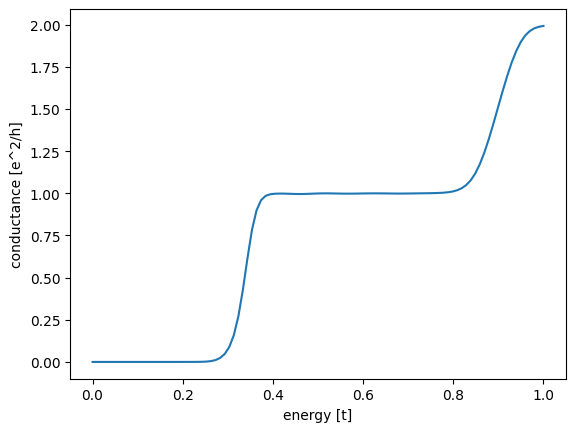

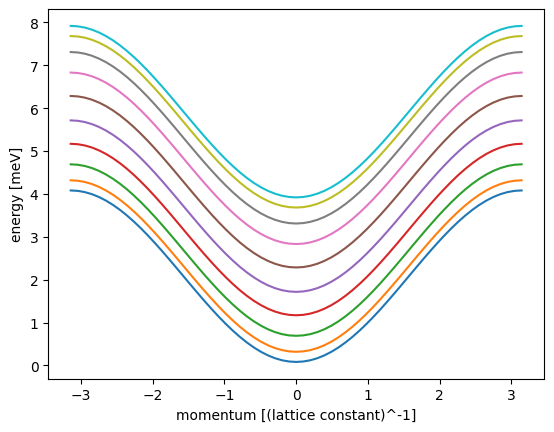

<Figure size 640x480 with 0 Axes>

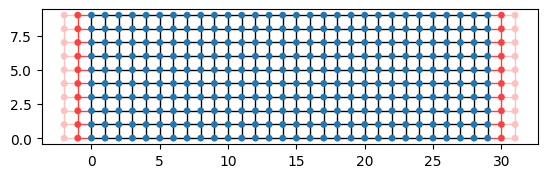

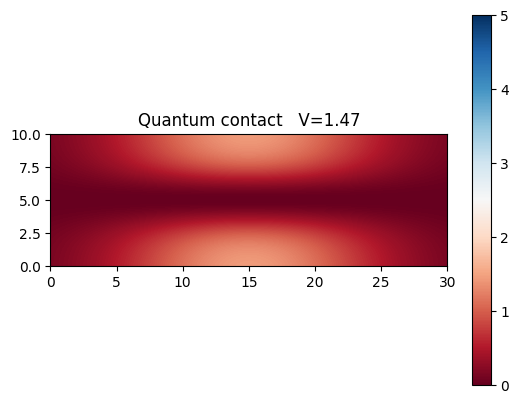

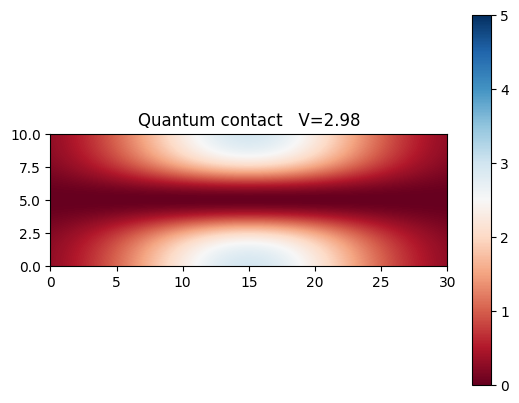

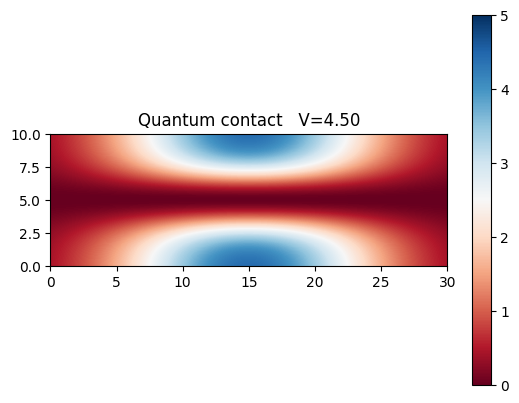

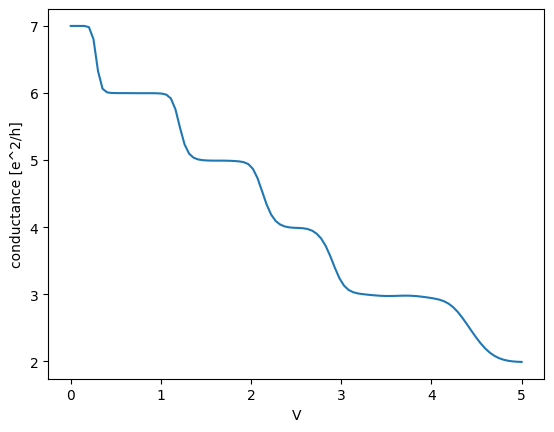

In [12]:


sys=make_system()
plot_conductanc_energy(sys,np.linspace(0.0001,1,100))
plot_conductance_pots(3, np.linspace(0.001, 5, 100))